In [1]:
#importing the required libraries:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
import matplotlib.pyplot as plt
import nltk
import seaborn
from collections import Counter


In [2]:
#list of possible encoding 
encodings = ['latin1','ISO-8859','cp1252','utf-8']
file_path = r"C:\Users\SHIVANI\Downloads\archive (3)\spam.csv"

#attempt to read the CSV file with different encoding

for encoding in encodings:
    try:
        df = pd.read_csv(file_path,encoding=encoding)
        print(f"File successfullly read with encoding:{encoding}")
        break
    except UnicodeDecodeError:
            print(f"Failed to read with encoding: {encoding}")
            continue 
if "df" in locals():
    print("csv file has been successfully loaded")
else:
    print("failed")

File successfullly read with encoding:latin1
csv file has been successfully loaded


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3780,ham,"Dear friends, sorry for the late information. ...",NaN,NaN,NaN
403,ham,None of that's happening til you get here though,NaN,NaN,NaN
639,ham,I had askd u a question some hours before. Its...,NaN,NaN,NaN
722,ham,That is wondar full flim.,NaN,NaN,NaN
411,ham,Cos i want it to be your thing,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#data and business understaning
#EDA
#text preprocessing 
#model building 
#evaluation
#improvement
#website
#deployment 


#  DATA CLEANING 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop the last three columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [8]:
df.sample(5)

,v1,v2
4179,ham,"swhrt how u dey,hope ur ok, tot about u 2day.l..."
4206,ham,"Lets use it next week, princess :)"
2365,ham,Ok try to do week end course in coimbatore.
4691,ham,"By march ending, i should be ready. But will c..."
495,ham,Got meh... When?


In [9]:
#rename the columns:
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
3660,ham,Well then you have a great weekend!
919,ham,Dont talk to him ever ok its my word.
3082,ham,K..k:)how about your training process?
3039,ham,One day a crab was running on the sea shore..T...
817,ham,Also are you bringing galileo or dobby


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
 

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check duplicate values
df.duplicated().sum()

403

In [15]:
#drop duplicated values
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

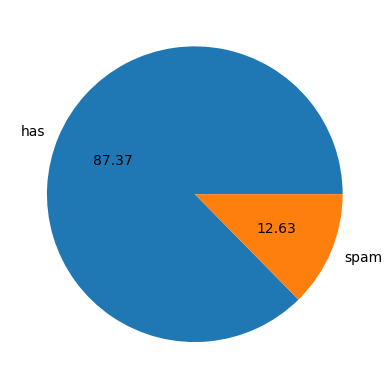

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['has','spam'],autopct="%0.2f")
plt.show()

In [21]:
#Big chunck of ham and very less spam data is balanced 

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#number of words
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#targetting ham
df[df['target'] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#targetting spam
df[df['target'] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

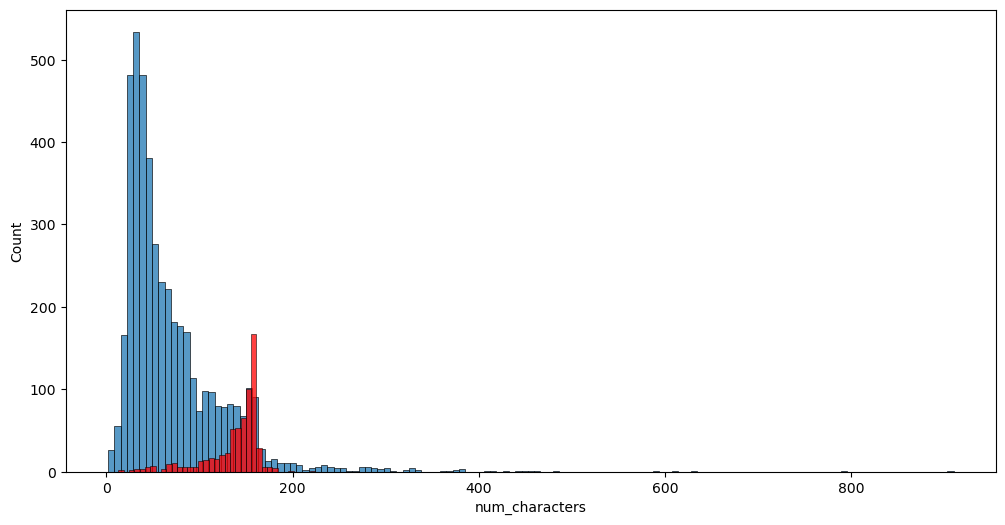

In [33]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

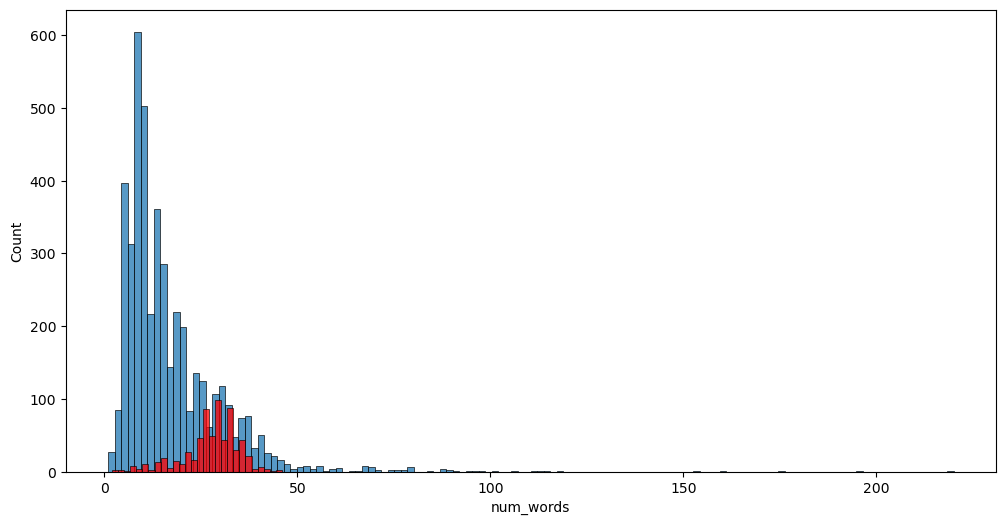

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

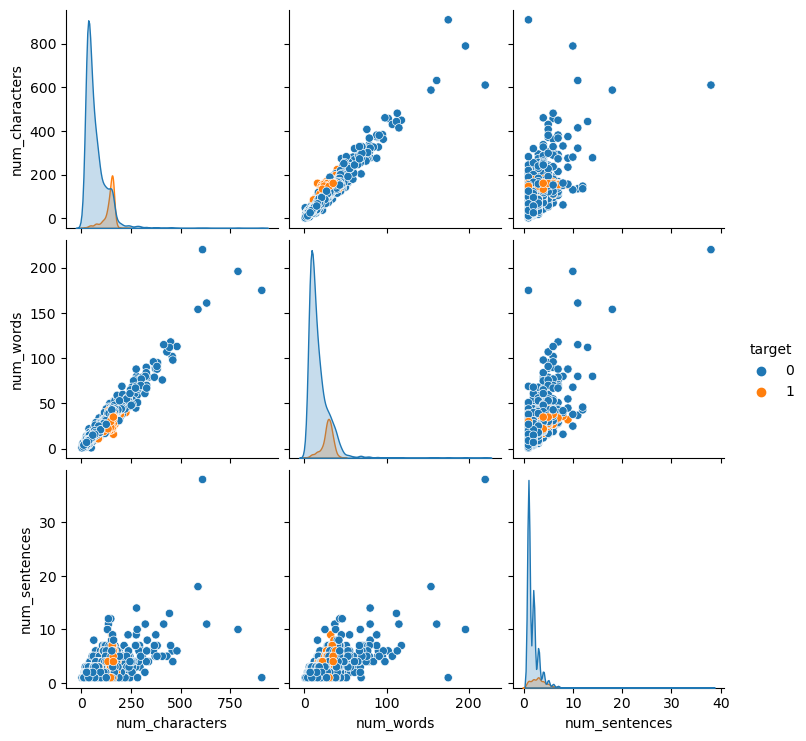

In [35]:
sns.pairplot(df,hue='target')

C:\Users\SHIVANI\AppData\Local\Temp\ipykernel_25092\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

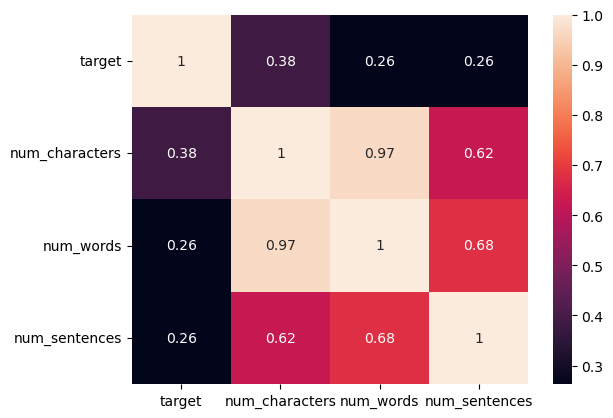

In [36]:
sns.heatmap(df.corr(),annot=True)

# DATA PREPROCESSING
-LOWER CASE
-TOKENIZATION
-REMOVING SPECIAL CHARACTERS
-REMOVING STOPWORDS AND PUNCTUATION
-STEMMING

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
transformed_text = transform_text("I'm gonna be home soon and don't wnat to talk about stuff anymore tonight, k? I've cried enogh")
print(transformed_text)    

gon na home soon wnat talk stuff anymor tonight k cri enogh


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [38]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [40]:
df['transformed_text'] = df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target'] ==1]['transformed_text'].str.cat(sep=" "))

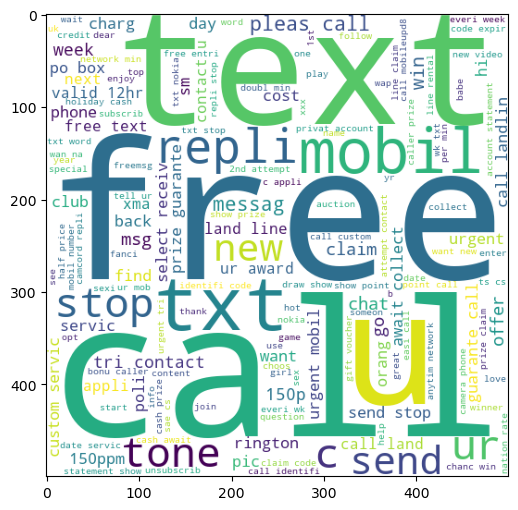

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target'] ==0]['transformed_text'].str.cat(sep=" "))

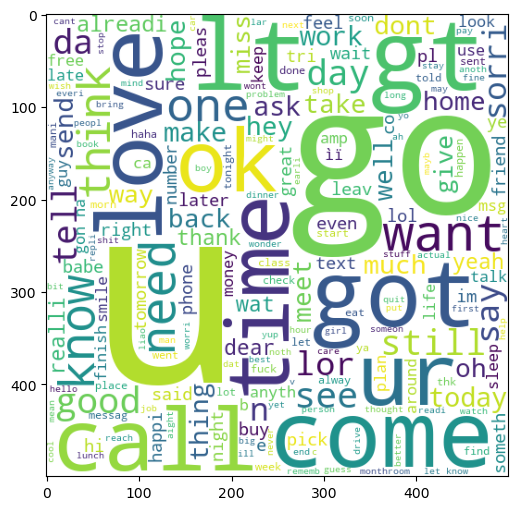

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
       

In [49]:
len(spam_corpus)

9939

In [50]:
!pip install Counter

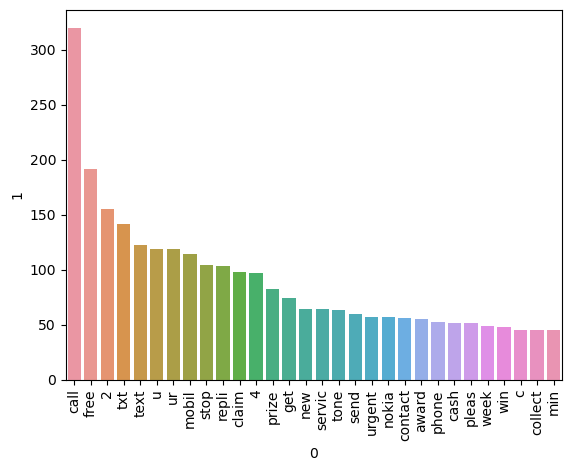

In [51]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'spam_corpus' is a list or iterable
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [52]:
ham_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

9939

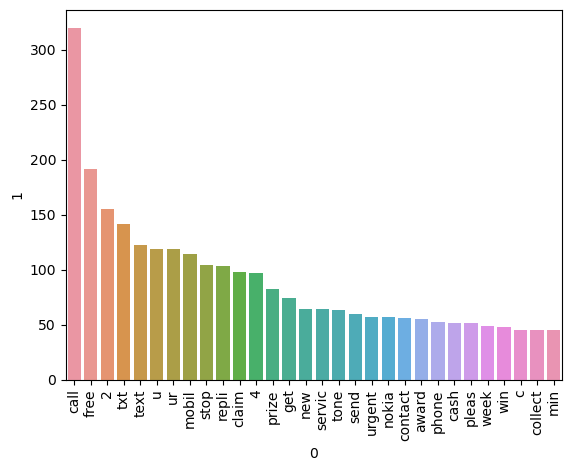

In [54]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ham_corpus' is a list or iterable
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
#vectorization
#using bag the bags
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# building the model

In [56]:
!pip install scikit-learn as sklearn

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [58]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
X.shape

(5169, 3000)

In [60]:
y = df['target'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [66]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [68]:
#tfidg.....>MNB 

In [69]:
!pip install xgboost

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble  import BaggingClassifier
from sklearn.ensemble  import ExtraTreesClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
mnb_model = MultinomialNB()
svc = SVC(kernel ='sigmoid', gamma = 1.0)
Knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear' ,penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50,random_state = 2)
bc = BaggingClassifier(n_estimators = 50,random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [79]:
clfs = {
    'SVC' : svc,
    'KN' : Knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'Xgb' : xgb
    
}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [83]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [89]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_Precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_Precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_Precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  Xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.932302,0.833333
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


In [94]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.932302
4,LR,Accuracy,0.958414
5,RF,Accuracy,0.975822
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.958414
8,ETC,Accuracy,0.974855
9,GBDT,Accuracy,0.946809


AttributeError: module 'matplotlib.pyplot' has no attribute 'shoe'

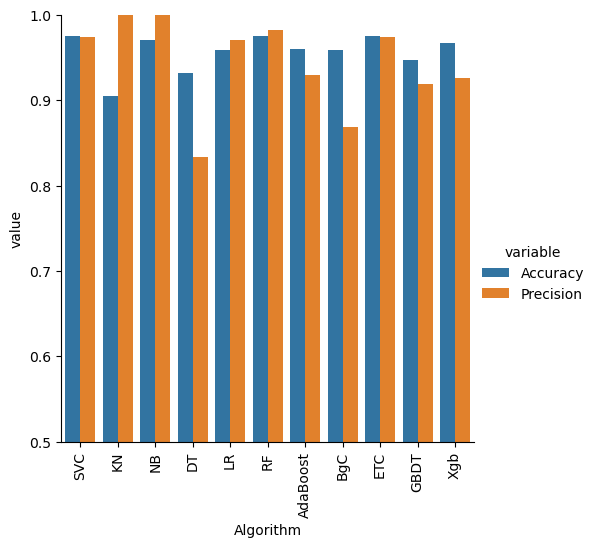

In [95]:
sns.catplot(x = "Algorithm",y = "value",
           hue = "variable", data = performance_df1,kind = "bar",height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = "vertical")
plt.shoe()

In [ ]:
#model improve

In [101]:
temp_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_max_ft_3000":accuracy_scores,"precision_max_ft_3000":precision_scores})

In [103]:
new_df = performance_df.merge(temp_df,on = "Algorithm")

In [105]:
new_df_scaled = new_df.merge(temp_df,on ="Algorithm")

In [106]:
temp_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_num_chars":accuracy_scores,"precision_num_chars":precision_scores})

In [107]:
new_df_scaled.merge(temp_df,on = "Algorithm")

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,precision_max_ft_3000_x,Accuracy_max_ft_3000_y,precision_max_ft_3000_y,Accuracy_num_chars,precision_num_chars
0,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
2,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
3,DT,0.932302,0.833333,0.932302,0.833333,0.932302,0.833333,0.932302,0.833333
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
8,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192


In [108]:
#voting classifier
svc = SVC(kernel ='sigmoid', gamma = 1.0)
mnb_model = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)

from sklearn.ensemble import VotingClassifier

In [109]:
voting = VotingClassifier(estimators=[("svm",svc),("nb",mnb),("et",etc)],voting = "soft")

In [110]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [113]:
#applying stacking
estimators = [('svm', svc),("nb", mnb),("et",etc)]
final_estimator = RandomForestClassifier()

In [115]:
from sklearn.ensemble import StackingClassifier


In [116]:
clf = StackingClassifier(estimators = estimators,final_estimator = final_estimator)

In [119]:
import pickle
pickle.dump(tfidf,open("Vectorizer,pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))

In [130]:
import pickle 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


#sample text data and corresponding lablels
X_train = ["sample text 1","sample text2","sample text 3"]
y_train =[0,1,0]#example labels

#create and train TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase = True, stop_words = "english")
X_train_tfidf = tfidf.fit_transform(X_train)

#create and train the naive bayes classifier
mnb_model = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

#save the trained Tf-IDF vectorizer and naive bayes model to files 
with open("vectorizer.pkl","wb") as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)
    
with open("model.pkl","wb") as model_file:
    pickle.dump(mnb,model_file)